### Importing the libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('./heart.csv')

### Our Dataset

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Attribute information
1. age
2. sex (1: male, 0:female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target (1: have heart diease, 0: does not have heart disease)

In [4]:
df.shape

(303, 14)

### Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking the missing values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

### Deleting the duplicate value and the reason I am deleting it because there is only one duplicate value

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(302, 14)

### Summary of the dataset

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking the outliers in all the attributes

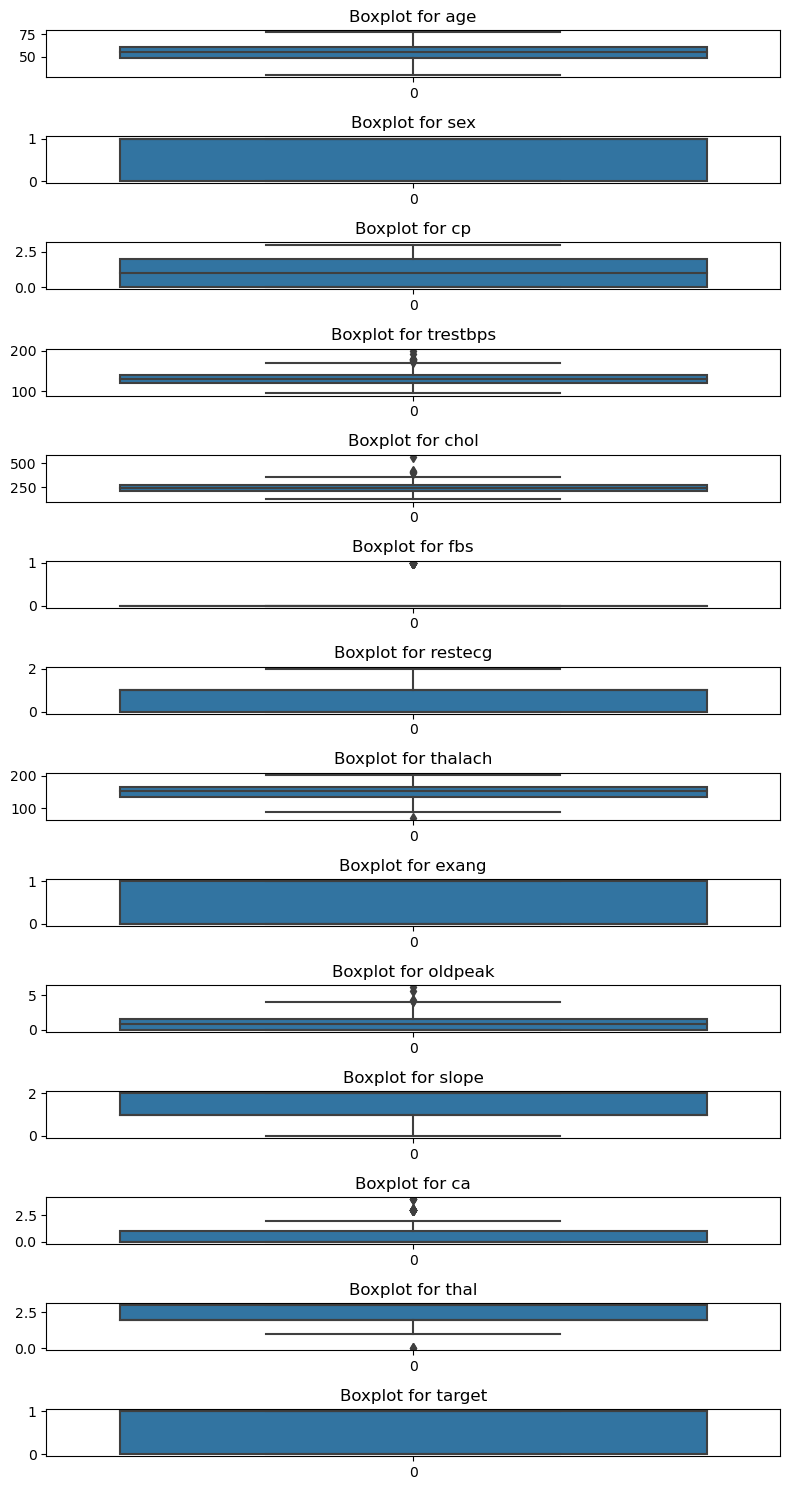

In [11]:
cols=df.select_dtypes(include=['number']).columns
col_num=len(cols)

fig, axes=plt.subplots(nrows=col_num, ncols=1, figsize=(8, 15))

for index, col in enumerate(cols):
    sns.boxplot(df[col], ax=axes[index])
    axes[index].set_title(f'Boxplot for {col}')
 
plt.tight_layout()
plt.show()

### Dealing with outliers in 'trestbps' attribute using the capping method

In [12]:
Q1=df['trestbps'].quantile(0.25)
Q3=df['trestbps'].quantile(0.75)
IQR=Q3-Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR

print("Lower Range:", lower_range)
print("Upper Range:", upper_range)

Q1: 120.0
Q3: 140.0
IQR: 20.0
Lower Range: 90.0
Upper Range: 170.0


In [13]:
df['trestbps']=df['trestbps'].apply(lambda x: lower_range if x<lower_range else (upper_range if x>upper_range else x))

### After dealing with the outliers

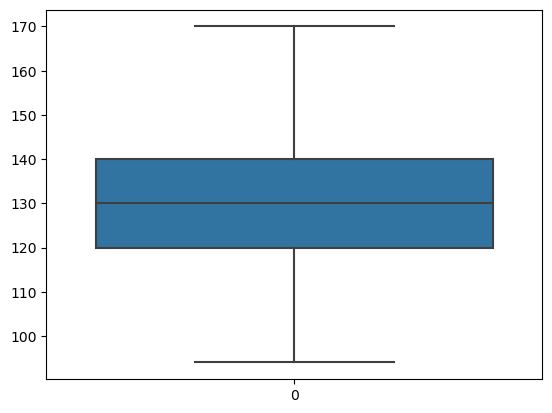

In [14]:
sns.boxplot(df['trestbps'])
plt.show()

### In a similar fashion, I will deal with the outliers in the other attributes

In [15]:
def dealing_with_outliers(col):

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    print(f"Q1 of {col}:", Q1)
    print(f"Q3 of {col}:", Q3)
    print(f"IQR of {col}:", IQR)

    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR

    print(f"Lower Range of {col}:", lower_range)
    print(f"Upper Range of {col}:", upper_range)
    print("\n")
    
    df[col]=df[col].apply(lambda x: lower_range if x<lower_range else (upper_range if x>upper_range else x))

In [16]:
cols_to_deal=['chol', 'oldpeak', 'ca']

for i in cols_to_deal:
    dealing_with_outliers(i)

Q1 of chol: 211.0
Q3 of chol: 274.75
IQR of chol: 63.75
Lower Range of chol: 115.375
Upper Range of chol: 370.375


Q1 of oldpeak: 0.0
Q3 of oldpeak: 1.6
IQR of oldpeak: 1.6
Lower Range of oldpeak: -2.4000000000000004
Upper Range of oldpeak: 4.0


Q1 of ca: 0.0
Q3 of ca: 1.0
IQR of ca: 1.0
Lower Range of ca: -1.5
Upper Range of ca: 2.5




### Now, majorly there are no outliers in the dataset

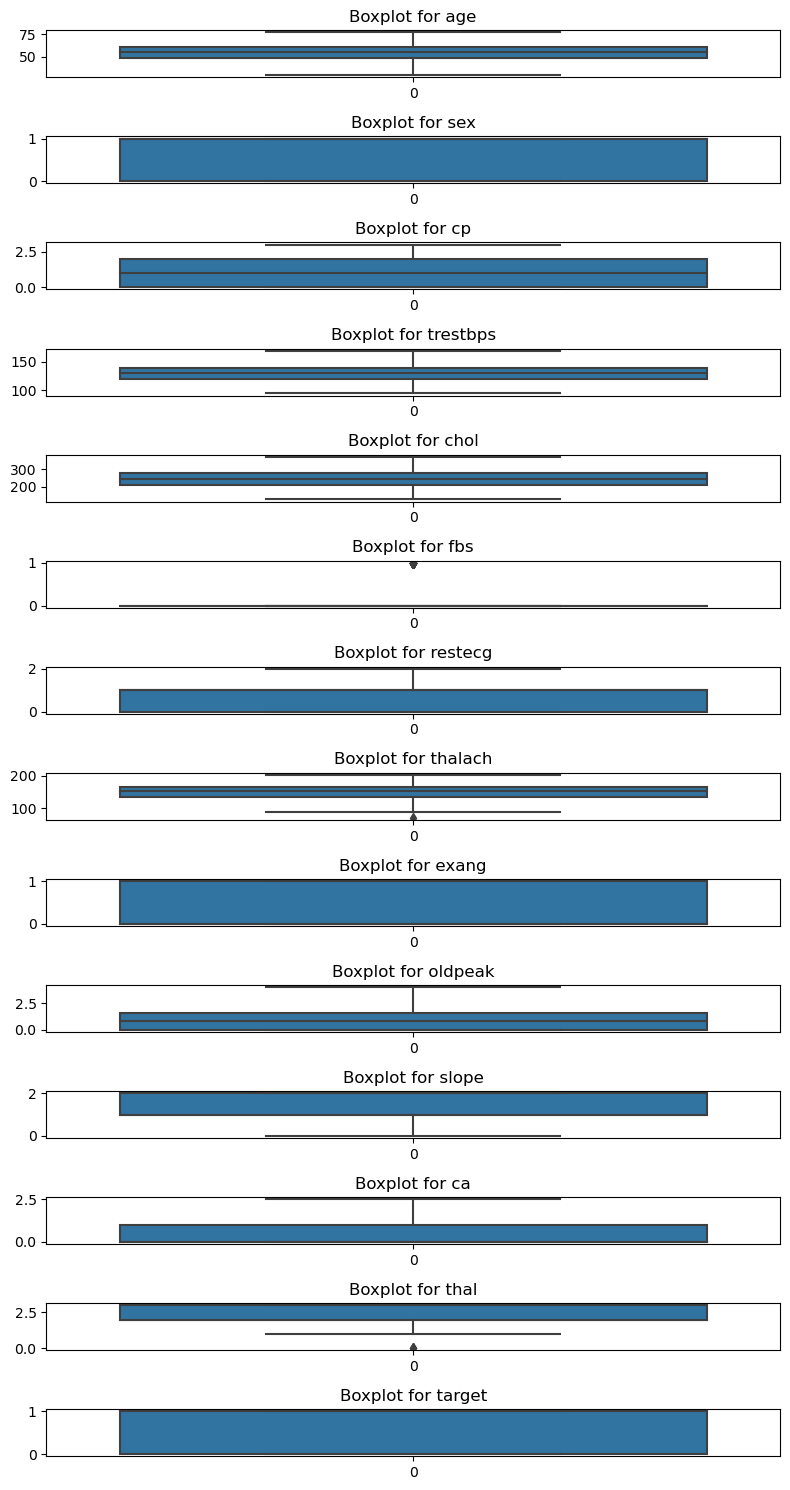

In [17]:
cols=df.select_dtypes(include=['number']).columns
col_num=len(cols)

fig, axes=plt.subplots(nrows=col_num, ncols=1, figsize=(8, 15))

for index, col in enumerate(cols):
    sns.boxplot(df[col], ax=axes[index])
    axes[index].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

### There is a little imbalance in the dataset

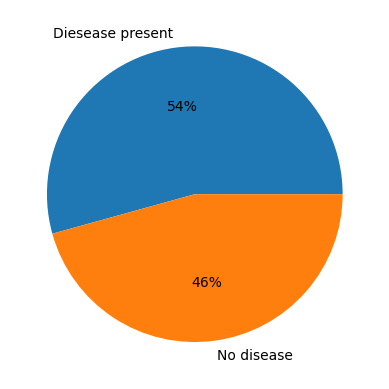

In [18]:
labels=['Diesease present', 'No disease']
plt.pie(df['target'].value_counts(), labels=labels, autopct='%1.f%%')
plt.show()

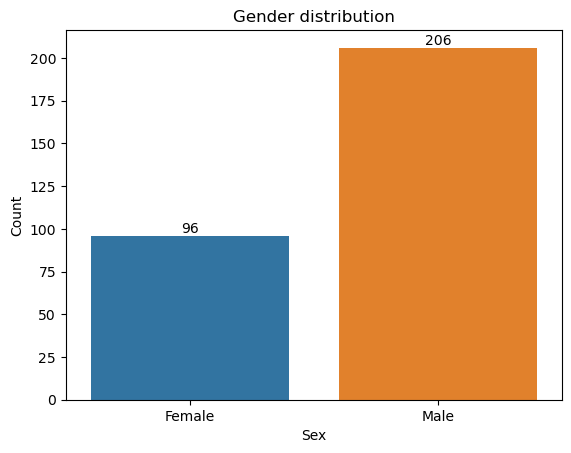

In [19]:
ax=sns.countplot(x='sex', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Gender distribution")
ax.set_xticklabels(['Female', 'Male'])
plt.show()

In [20]:
grouped_data=df.groupby(['sex', 'target']).size().reset_index(name='count')
grouped_data['target'] = grouped_data['target'].map({0: 'No disease', 1: 'Have disease'})
grouped_data

,sex,target,count
0,0,No disease,24
1,0,Have disease,72
2,1,No disease,114
3,1,Have disease,92


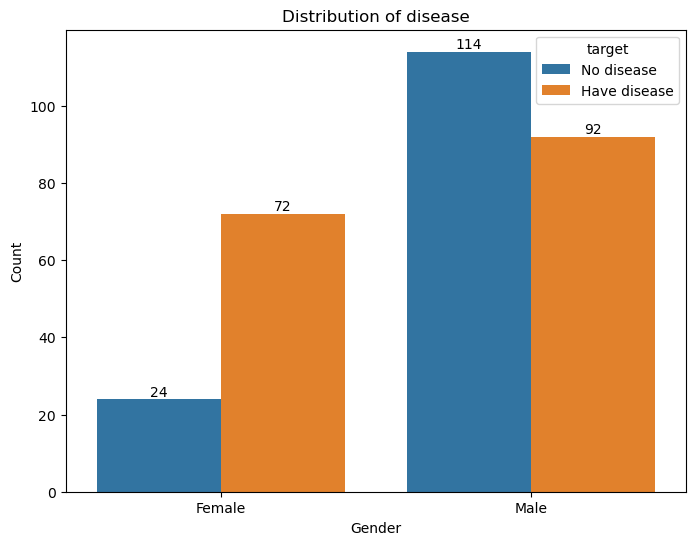

In [21]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(x='sex', y='count', hue='target', data=grouped_data)
for containers in ax.containers:
    ax.bar_label(containers)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of disease")
ax.set_xticklabels(['Female', 'Male'])
plt.show()

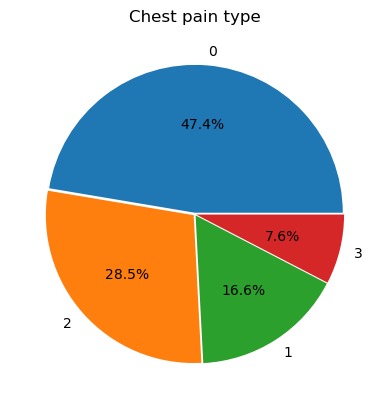

In [22]:
labels=['0', '2', '1', '3']
plt.pie(df['cp'].value_counts(), autopct='%1.1f%%', explode=[0.01, 0.01, 0.01, 0.01], labels=labels)
plt.title("Chest pain type")
plt.show()

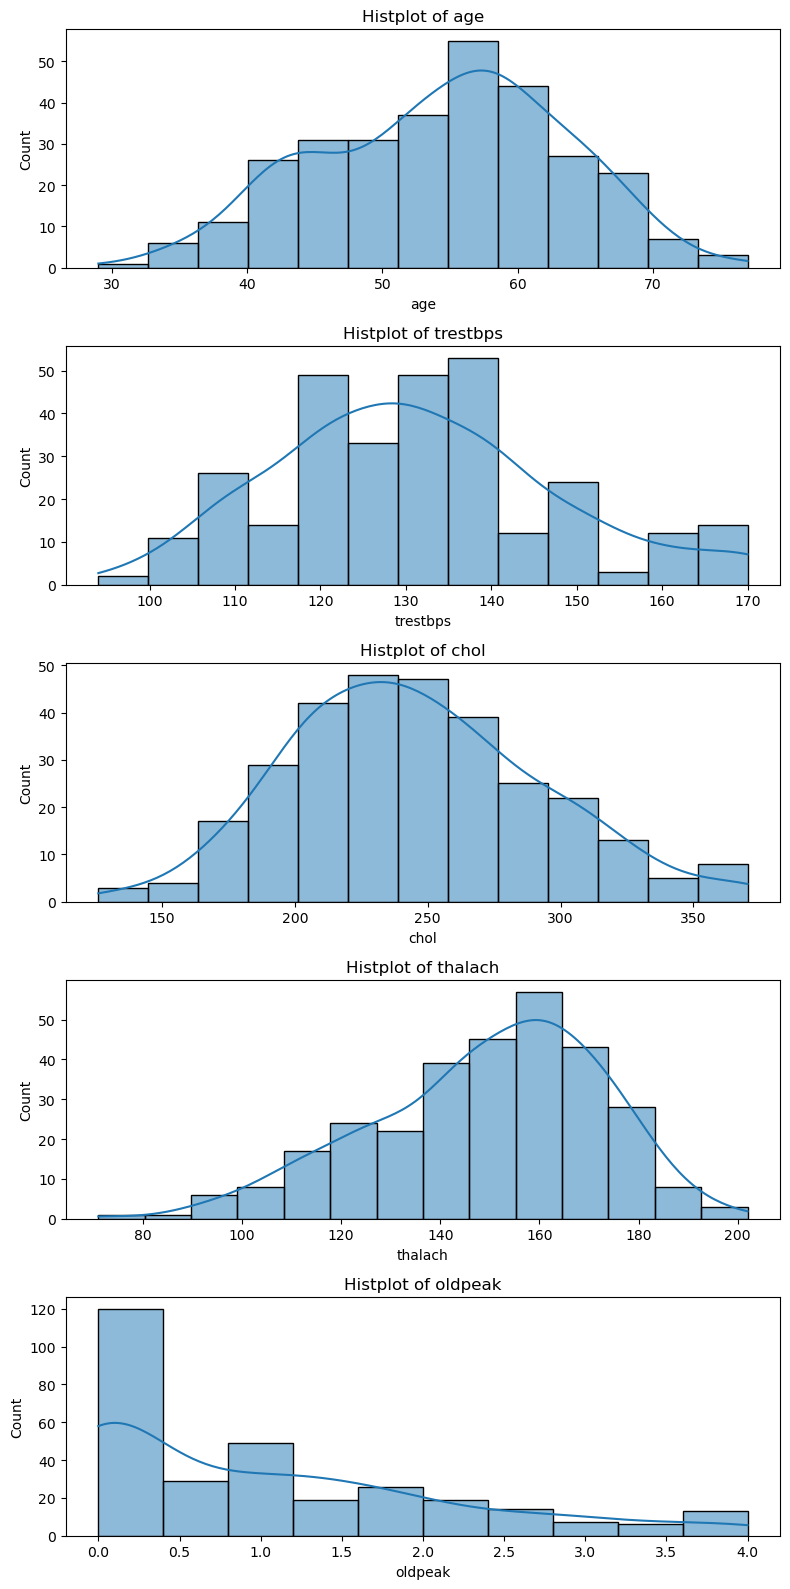

In [23]:
cols_to_consider=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
col_list=len(cols_to_consider)
fig, axes=plt.subplots(nrows=col_list, ncols=1, figsize=(8, 16))

for index, col in enumerate(cols_to_consider):
    sns.histplot(df[col], ax=axes[index], kde=True)
    axes[index].set_title(f"Histplot of {col}")
plt.tight_layout()
plt.show()

In [24]:
cols_to_consider=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in cols_to_consider:
    print(f"Skewness of {col}:", skew(df[col]))

Skewness of age: -0.20272991021357126
Skewness of trestbps: 0.387936484227469
Skewness of chol: 0.33402983912633294
Skewness of thalach: -0.5300218699527914
Skewness of oldpeak: 0.9889531970719401


### Skewness
#### Positively skewed attributes: trestbps, chol, oldpeak
#### Negatively skewed attributes: age, thalach

### Since, I will be using Linear Regression and for that I have to do scaling. Therefore, I am creating a dummy dataset to use Linear Regression because other algorihtms like Decision Tree or Random Forest, we do not need to do scaling

In [25]:
df_for_linear_regression=df.copy()

### Log transformation of right skewed data

In [26]:
postively_skewed=['trestbps', 'chol', 'oldpeak']
for col in postively_skewed:
    df_for_linear_regression[col] = np.log(df_for_linear_regression[col] + 1)

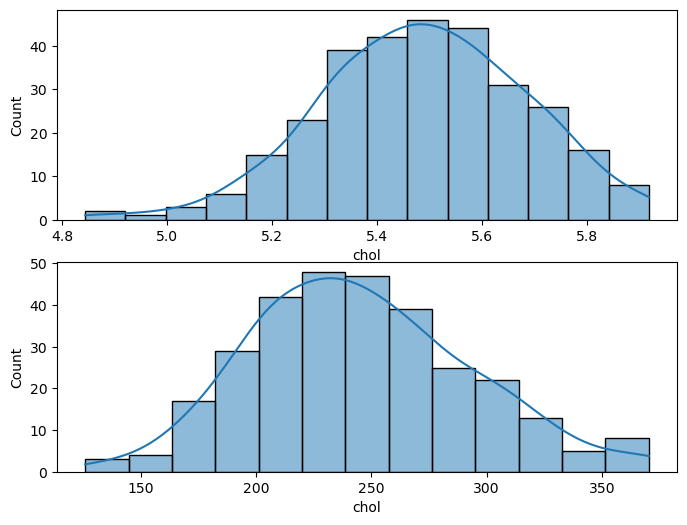

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(df_for_linear_regression['chol'], kde=True, ax=axes[0])
sns.histplot(df['chol'], kde=True, ax=axes[1])
plt.show()

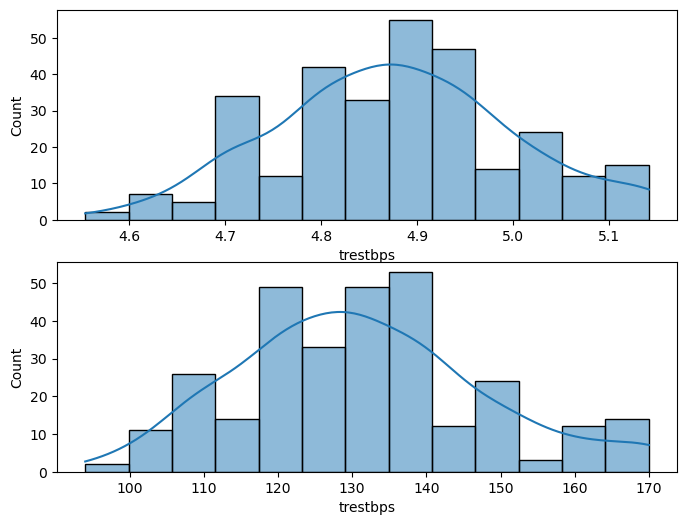

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(df_for_linear_regression['trestbps'], kde=True, ax=axes[0])
sns.histplot(df['trestbps'], kde=True, ax=axes[1])
plt.show()

### We can see change in the values after using log transformation

### Now, lets use Square root transformation for negatviely skewed values

In [29]:
negatively_skewed=['age', 'thalach']
for col in negatively_skewed:
    df_for_linear_regression[col]=np.sqrt(df_for_linear_regression[col])

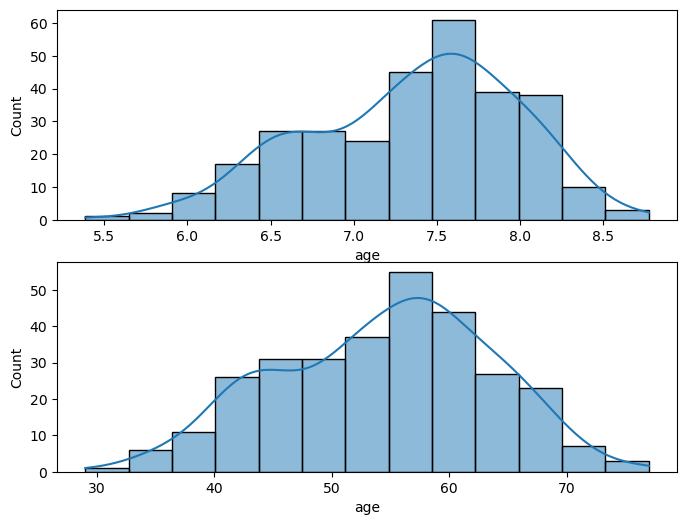

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(df_for_linear_regression['age'], kde=True, ax=axes[0])
sns.histplot(df['age'], kde=True, ax=axes[1])
plt.show()

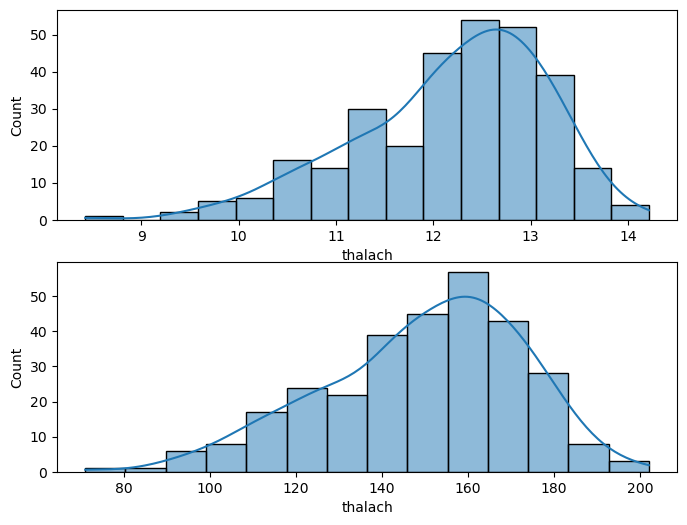

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(df_for_linear_regression['thalach'], kde=True, ax=axes[0])
sns.histplot(df['thalach'], kde=True, ax=axes[1])
plt.show()

In [32]:
scaler=StandardScaler()

In [33]:
cols_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in cols_to_scale:
    df_for_linear_regression[col]=scaler.fit_transform(df_for_linear_regression[[col]])

### Distribution of graphs after using Standard Scaler

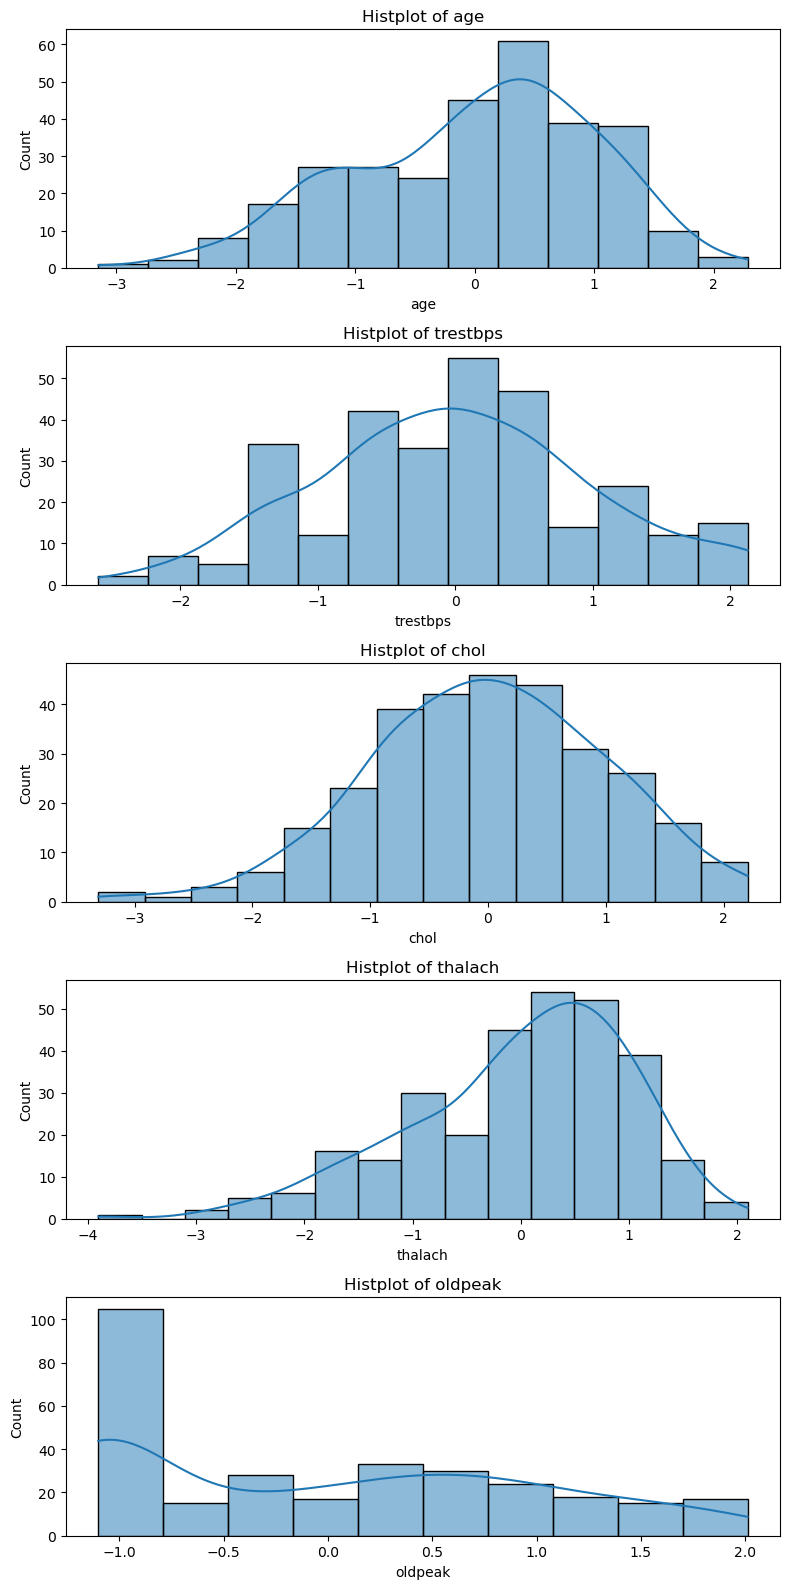

In [34]:
cols_to_consider=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
col_list=len(cols_to_consider)
fig, axes=plt.subplots(nrows=col_list, ncols=1, figsize=(8, 16))

for index, col in enumerate(cols_to_consider):
    sns.histplot(df_for_linear_regression[col], ax=axes[index], kde=True)
    axes[index].set_title(f"Histplot of {col}")
plt.tight_layout()
plt.show()

In [35]:
X=df_for_linear_regression.drop(columns=['target'])
y=df_for_linear_regression['target']

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (241, 13)
X_test: (61, 13)
y_train: (241,)
y_test: (61,)


In [38]:
log_model=LogisticRegression()

In [39]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [40]:
log_model_predict=log_model.predict(X_test)

In [81]:
log_accuracy=round(accuracy_score(y_test, log_model_predict), 2)

In [82]:
print(classification_report(y_test, log_model_predict))
print("\n")
print("Accuracy score:", log_accuracy)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Accuracy score: 0.85


In [42]:
log_reg_scores=log_model.predict_proba(X_test)[:,1]

In [43]:
fpr, tpr, thresholds=roc_curve(y_test, log_reg_scores)

In [44]:
thresholds

array([       inf, 0.99191772, 0.87278784, 0.86943029, 0.72129076,
       0.61026443, 0.58355787, 0.56280191, 0.54851405, 0.51866339,
       0.27077442, 0.12905641, 0.10897977, 0.02536221, 0.02163782,
       0.00144857])

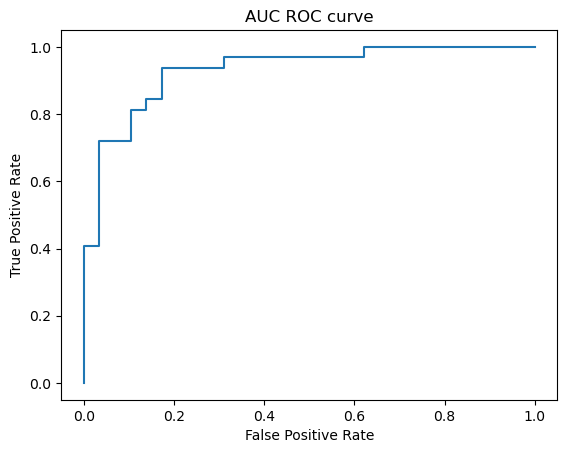

In [45]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC curve")
plt.show()

In [46]:
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_idx]
print("Optimal threshold value for Logistic Regression:", optimal_threshold)

Optimal threshold value for Logistic Regression: 0.27077442388000167


In [47]:
optimized_log_model=(log_reg_scores>=optimal_threshold).astype(int)

In [48]:
print(classification_report(y_test, optimized_log_model))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### The performance of Logistic Regression enhanced after optimizing the threshold value

In [85]:
optimized_log_accuracy=round(accuracy_score(y_test, optimized_log_model), 2)*100

In [87]:
print(optimized_log_accuracy)

89.0


### Let's check with the Decision Tree Classifier

In [49]:
X=df.drop(columns=['target'])
y=df['target']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (302, 13)
y shape: (302,)


In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (241, 13)
X_test shape: (61, 13)
y_train shape: (241,)
y_test shape: (61,)


In [52]:
dt_classifier=DecisionTreeClassifier()

In [53]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
dt_training=dt_classifier.predict(X_train)

In [60]:
print("Training accuracy of Decision Tree:", round(accuracy_score(y_train, dt_training),2)*100)

Training accuracy of Decision Tree: 100.0


In [57]:
y_pred=dt_classifier.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [88]:
dt_accuracy=round(accuracy_score(y_test, y_pred),2)*100

In [89]:
print("Accuracy of Decision Tree Classifier:", dt_accuracy)

Accuracy of Decision Tree Classifier: 79.0


### Apparenty, the DT Classifier is overfitting because the training accuracy is 100% but the testing accuracy is just 79%

### Let's try to optimize the performance of the DT Classifier by using RandomizedSearchCV so that our model doesn't overfit

In [66]:
param_grid={
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, 
                                   n_iter=20, cv=5, random_state=42, scoring='accuracy')

In [67]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20]},
                   random_state=42, scoring='accuracy')

In [76]:
print("Best Params:", random_search.best_params_)
print("Training accuracy:", round(random_search.best_score_, 2)*100)

Best Params: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 10}
Training accuracy: 80.0


In [90]:
optimized_dt_accuracy=round(test_accuracy, 2)*100

In [91]:
test_accuracy = random_search.score(X_test, y_test)
print("Testing accuracy: ", optimized_dt_accuracy)

Testing accuracy:  84.0


### By using the best parameters for the DT Classifier, we can see the enhanced accuracy of our model

### Now let's compare the performance of our models

In [92]:
accuracy_scores={
    'model': ['Logistic Regression', 'Optimized Logistic Regression', 'Decision Tree Classifier', 'Optimized Decision Tree Classifier'],
    'accuracy':[log_accuracy, optimized_log_accuracy, dt_accuracy, optimized_dt_accuracy]
}

In [96]:
accuracy_df=pd.DataFrame(accuracy_scores)

In [97]:
accuracy_df

,model,accuracy
0,Logistic Regression,0.85
1,Optimized Logistic Regression,89.00
2,Decision Tree Classifier,79.00
3,Optimized Decision Tree Classifier,84.00


KeyError: "None of [Index(['Accuracy'], dtype='object')] are in the [columns]"